In [1]:
%matplotlib inline
from __future__ import print_function, division
from neuralnilm.source import RandomSegments, RandomSegmentsInMemory, SameLocation
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10.0, 8.0)
import numpy as np
from sys import stdout

In [2]:
source = SameLocation(
    filename='/data/mine/vadeec/merged/ukdale.h5',
    #target_appliance=['washer dryer', 'washing machine'],
    target_appliance=['fridge freezer', 'fridge'],
    #window=("2013-03-18", None),
    window=("2013-03-18", "2013-05-18"),
    #window=("2013-04-01", "2013-08-01"),
    seq_length=512,
    train_buildings=[1],#,2,3,4,5],
    validation_buildings=[1],#,2,3,4,5],
    n_seq_per_batch=4,
    standardise_input=True,
    independently_center_inputs=True,
    standardise_targets=True,
    subsample_target=8,
    allow_incomplete=True,
    ignore_incomplete=True,
    include_all=True,
    skip_probability=0.25,
    offset_probability=1
    #ignore_offset_activations=True
)

Loaded 1508 fridge freezer activations from house 1.


INFO:neuralnilm.source:Loaded 1508 fridge freezer activations from house 1.


Loaded mains data for building 1.


INFO:neuralnilm.source:Loaded mains data for building 1.


In [3]:
source.validation_buildings

[1]

In [4]:
source.train_buildings

[1]

In [5]:
def plot_data(X, y, seq_i=0):
    fig, axes = plt.subplots(nrows=2, sharex=False)
    axes[0].plot(y[seq_i, :, 0])
    axes[1].plot(X[seq_i, :, 0])
    plt.show()

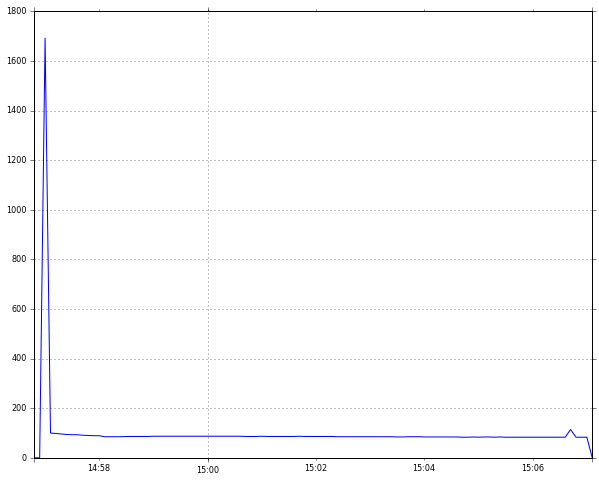

In [6]:
source.activations[1][13].plot()

In [7]:
len(source.activations[1])

1508

In [20]:
#source.n_seq_per_batch = 4
#source.skip_probability = 0.5
source.ignore_incomplete = False
X_val, y_val = source.validation_data()

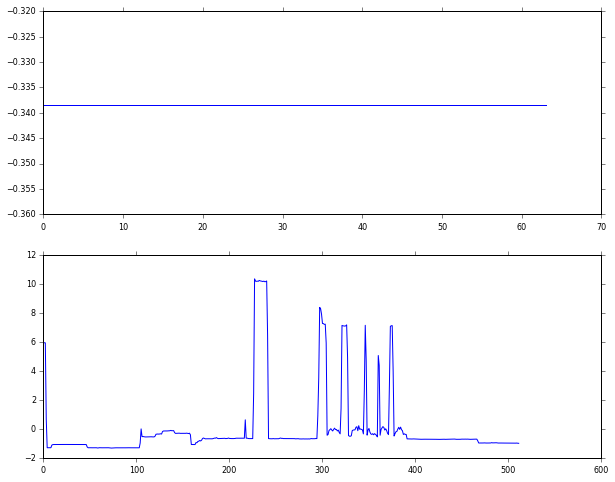

In [21]:
plot_data(X_val, y_val, 0)

In [22]:
source.start()

In [135]:
source.ignore_incomplete = True
X, y = source.queue.get(timeout=5)

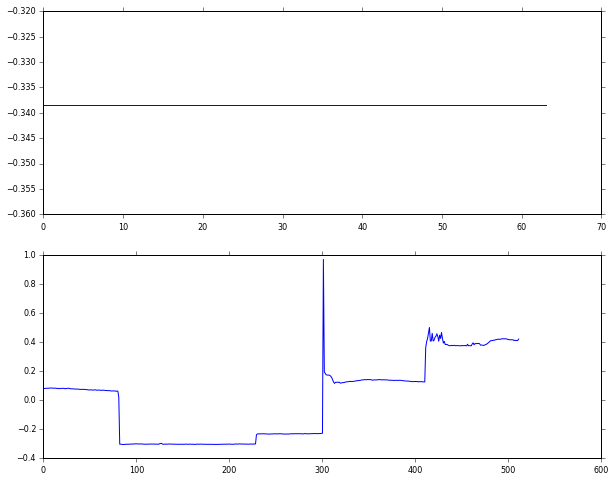

In [136]:
plot_data(X, y, 0)

In [18]:
i = 0
while True:
    print("\r", i, end="")
    stdout.flush()
    X, y = source.queue.get(timeout=5)
    if (X[0] == X_val[0]).all():
        print("ahhh!")
        break
    i += 1

 168629

KeyboardInterrupt: 

In [6]:
source.dataset.buildings[1].elec['washer dryer'].dominant_appliance().type

{'categories': {'electrical': ['single-phase induction motor', 'resistive'],
  'google_shopping': ['laundry appliances'],
  'size': 'large',
  'traditional': 'wet'},
 'components': [{'categories': {'electrical': ['single-phase induction motor']},
   'description': 'drum motor',
   'n_ancestors': 1,
   'parent': 'component',
   'type': 'motor'},
  {'categories': {'electrical': ['single-phase induction motor']},
   'n_ancestors': 2,
   'parent': 'motor',
   'type': 'water pump'},
  {'additional_properties': {'volume': {'description': 'litres',
     'type': 'number'}},
   'categories': {'electrical': ['resistive']},
   'n_ancestors': 2,
   'parent': 'electric heating element',
   'type': 'electric water heater'},
  {'categories': {'electrical': ['resistive']},
   'description': 'clothes drying heating element',
   'n_ancestors': 2,
   'parent': 'electric heating element',
   'type': 'electric air heater'}],
 'control': ['manual', 'timer'],
 'distributions': {'rooms': [{'distance': 3,
    

In [9]:
min([a.index[-1] - a.index[0] for a in source.activations[1]])

Timedelta('0 days 00:07:42')

In [46]:
(2*60*60) / 6

1200.0

In [3]:
elec = source.dataset.buildings[4].elec

In [4]:
washer = elec['washing machine']

In [5]:
data = washer.power_series_all_data()

In [6]:
data.plot()